### Sklearn documentation -- https://scikit-learn.org/stable/

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\\Data Science\\Code basics\\py-master\\ML\\1_linear_reg\\homeprices.csv')

In [3]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


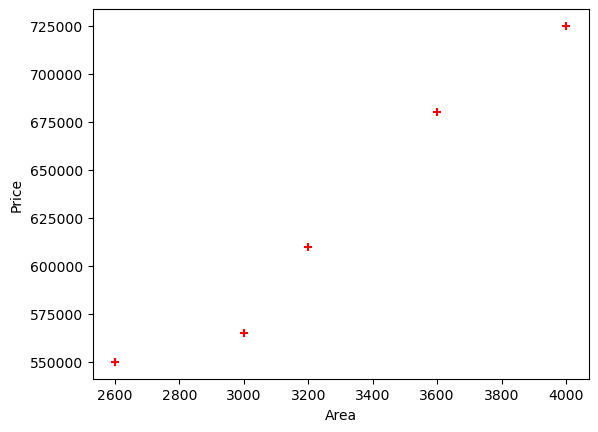

In [4]:
## plot a scatter plot to get an idea of distribution
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area, df.price, color='red', marker='+')

## After plotting this data we got an idea of the distribution is suitable for linear regression model

In [5]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [6]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [7]:


reg = linear_model.LinearRegression() # creating a linear regression object
reg.fit(new_df,price) # fitting the data for training the linear regression
## After executing this our model is ready to predict the prices

LinearRegression()

In [8]:
# lets do the prediction
reg.predict([[5000]])

C:\Users\Ajith\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [9]:
## lets look at the some internal details
## first it calculated the coefficient and intercept
## for looking the coeff

reg.coef_

# as we know already the linear equation is y = mx+b
# here the coef_ is the m value

array([135.78767123])

In [10]:
reg.intercept_ # it shows the value of b

180616.43835616432

In [11]:
## Let's check it here
m=135.78767123
x=3300
b=180616.43835616432
y=m*x+b
y # the predicted value is same here

628715.7534151643

In [12]:
m=135.78767123
x=5000
b=180616.43835616432
y=m*x+b
y 

859554.7945061643

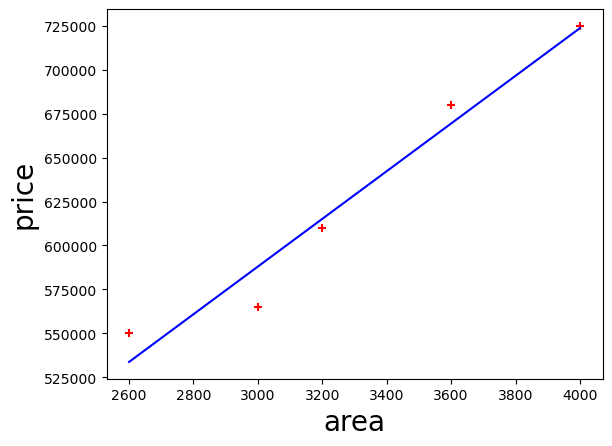

In [13]:
## plotting the linear equation line looks

%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

## It shows the visual representation of linear equation

## Generate CSV file with list of home price predictions

In [14]:
## reading the csv files
d = pd.read_csv('D:\\Data Science\\Code basics\\py-master\\ML\\1_linear_reg\\areas.csv')

In [15]:
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [16]:
# Using the regression model to fit the new data set which has area value
p = reg.predict(d)
## It returned the value of prices

In [17]:
d['prices'] = p

In [18]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [19]:
## Storing the predicted values to a csv file

d.to_csv('prediction.csv', index=False)